In [3]:
import pandas as pd
import seaborn as sns
import pandas.api.types as ptypes
import numpy as np
import missingno as msno

In [4]:
df1 = pd.read_csv("../data/joao_pessoa.csv").drop(columns=["andar"])
df2 = pd.read_csv("../data/joao_pessoa1.csv") \
    .drop(columns=["z_lat", "z_lon", "bairro_completo",
                   "comercio", "bairro", "zona"]) \
    .transform(lambda x: x.apply(lambda y: float(y)) if ptypes.is_bool_dtype(x) else x)
df = pd.concat([df1, df2]) \
    .drop_duplicates("id") \
    .reset_index(drop=True)

## Limpeza do banco de dados

In [5]:
df = df.fillna(
    value={
        "academia": 0, "area_servico": 0,
        "elevador": 0, "espaco_gourmet": 0,
        "piscina": 0, "playground": 0,
        "portaria_24_horas": 0, "quadra_de_esporte": 0,
        "salao_de_festa": 0, "sauna": 0,
        "spa": 0, "varanda_gourmet": 0}
    )

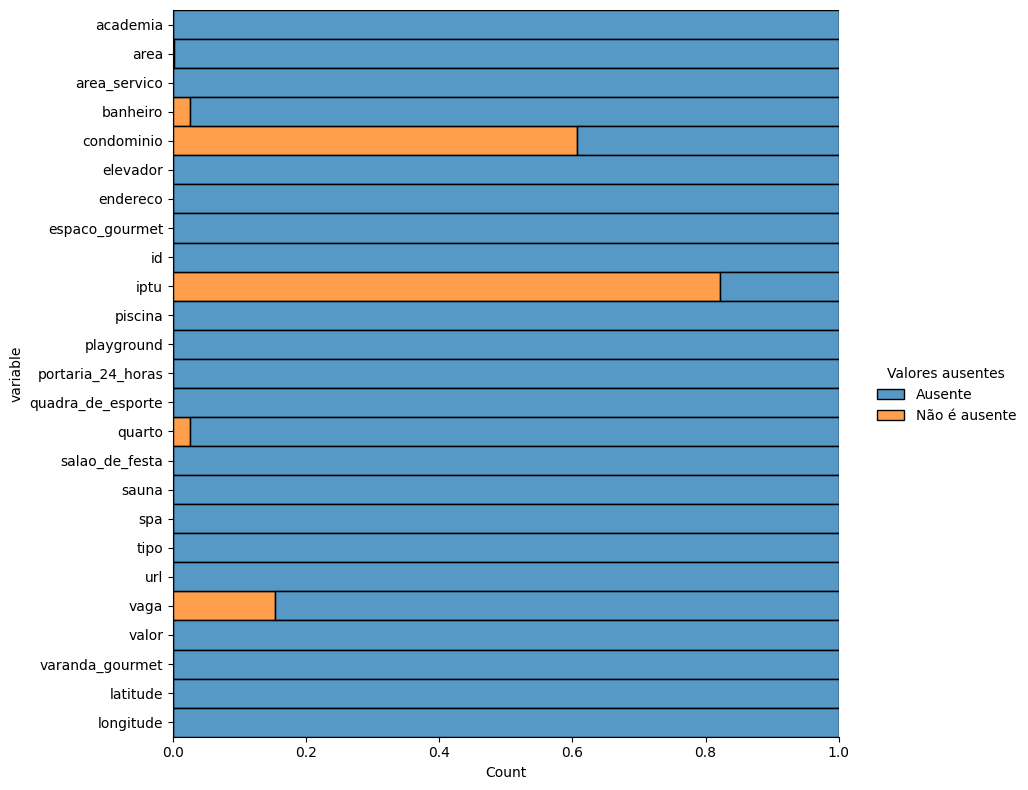

In [9]:
sns.displot(
    data=df.isnull()\
        .melt(value_name='Valores ausentes')\
        .replace([False, True], ["Ausente", "Não é ausente"]),
    y='variable',
    hue='Valores ausentes',
    multiple='fill',
    height=8,
    aspect=1.1
)


In [6]:
df.isna().melt(value_name="missing")

,variable,missing
0,academia,False
1,academia,False
2,academia,False
3,academia,False
4,academia,False
...,...,...
950320,longitude,False
950321,longitude,False
950322,longitude,False
950323,longitude,False
